In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the data
df = pd.read_csv("US_Accidents_Dec20_updated.csv", nrows=50000)
df.shape

(50000, 47)

In [3]:
df.head()
    
    

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50000 non-null  object 
 1   Severity               50000 non-null  int64  
 2   Start_Time             50000 non-null  object 
 3   End_Time               50000 non-null  object 
 4   Start_Lat              50000 non-null  float64
 5   Start_Lng              50000 non-null  float64
 6   End_Lat                50000 non-null  float64
 7   End_Lng                50000 non-null  float64
 8   Distance(mi)           50000 non-null  float64
 9   Description            50000 non-null  object 
 10  Number                 9999 non-null   float64
 11  Street                 50000 non-null  object 
 12  Side                   50000 non-null  object 
 13  City                   49996 non-null  object 
 14  County                 50000 non-null  object 
 15  St

In [5]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,9999.000000,48741.000000,14033.00000,48714.000000,48836.000000,48531.00000,42281.000000,5825.000000
mean,2.398100,36.242184,-95.703181,36.242391,-95.703117,0.712888,7072.313031,56.817552,23.47689,66.861724,30.030260,9.05879,9.374636,0.072676
std,0.660473,4.880886,14.606362,4.881075,14.606442,1.820027,9906.518208,21.753894,16.50981,20.607732,0.262919,3.06730,7.308667,0.615548
min,2.000000,25.129476,-123.526160,25.130927,-123.526160,0.000000,1.000000,-18.000000,-34.70000,4.000000,20.670000,0.00000,0.000000,0.000000
25%,2.000000,32.814282,-98.456010,32.816597,-98.453970,0.146000,1272.500000,39.900000,13.40000,52.000000,29.900000,10.00000,5.800000,0.000000
50%,2.000000,35.735790,-94.643180,35.733929,-94.642530,0.396000,3934.000000,60.800000,25.60000,68.000000,30.010000,10.00000,8.100000,0.000000
75%,3.000000,39.986595,-84.086604,39.985647,-84.083674,0.693000,9316.500000,73.400000,34.20000,84.000000,30.150000,10.00000,11.500000,0.030000
max,4.000000,48.125360,-67.868380,48.122370,-67.868380,151.525000,330991.000000,129.200000,101.00000,100.000000,30.920000,111.00000,822.800000,10.020000


In [7]:
data = df.isna().sum().sort_values(ascending = False)
data

Precipitation(in)        44175
Number                   40001
Wind_Chill(F)            35967
Wind_Speed(mph)           7719
Visibility(mi)            1469
Weather_Condition         1383
Humidity(%)               1286
Temperature(F)            1259
Pressure(in)              1164
Wind_Direction             454
Weather_Timestamp          449
Airport_Code                60
Timezone                    31
Zipcode                     28
Sunrise_Sunset               4
Civil_Twilight               4
Nautical_Twilight            4
Astronomical_Twilight        4
City                         4
Country                      0
Give_Way                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Turning_Loop                 0
Traffic_Signal               0
Traffic_Calming              0
Stop                         0
Station                      0
Roundabout                   0
Railway                      0
No_Exit                      0
Junction

In [8]:
#Calculating the percentage to misssing values
percent_missing = data / len(df) *100

In [9]:
percent_missing

Precipitation(in)        88.350
Number                   80.002
Wind_Chill(F)            71.934
Wind_Speed(mph)          15.438
Visibility(mi)            2.938
Weather_Condition         2.766
Humidity(%)               2.572
Temperature(F)            2.518
Pressure(in)              2.328
Wind_Direction            0.908
Weather_Timestamp         0.898
Airport_Code              0.120
Timezone                  0.062
Zipcode                   0.056
Sunrise_Sunset            0.008
Civil_Twilight            0.008
Nautical_Twilight         0.008
Astronomical_Twilight     0.008
City                      0.008
Country                   0.000
Give_Way                  0.000
Start_Time                0.000
End_Time                  0.000
Start_Lat                 0.000
Turning_Loop              0.000
Traffic_Signal            0.000
Traffic_Calming           0.000
Stop                      0.000
Station                   0.000
Roundabout                0.000
Railway                   0.000
No_Exit 

#Dropping these columsn as these are not useful to the dataset

In [10]:
df_1 = df.drop(columns = ["ID", "Start_Lng", "Start_Lat"], axis = 0 )

In [11]:
df_1.shape

(50000, 44)

In [12]:
df_1.columns

Index(['Severity', 'Start_Time', 'End_Time', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

- Let us look deeper into State and CIty for more insisght

In [13]:
df_1["State"]. unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT'],
      dtype=object)

In [14]:
top_10_accidents = df_1.State.value_counts()

In [15]:
top_10_accidents[:10]

CA    11104
TX    10933
MN     3005
FL     2939
MO     2482
IL     2354
NC     1739
OH     1413
NY     1323
PA      994
Name: State, dtype: int64

- From this we can see that California, Texas and Minnesota are the top 3 states where accidents are the highest

<AxesSubplot:>

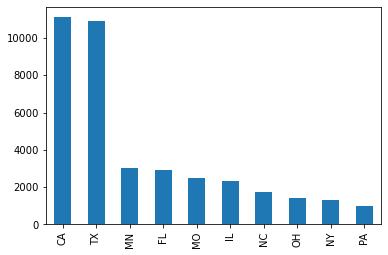

In [83]:
top_10_accidents[:10]. plot(kind = "bar")

In [17]:
df_1.columns

Index(['Severity', 'Start_Time', 'End_Time', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [18]:
df.City.unique()

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Benson', 'Totowa',
       'Lostant'], dtype=object)

In [19]:
df.City.value_counts()

Houston           3436
Dallas            3075
Charlotte         1223
Minneapolis       1155
Kansas City       1122
                  ... 
Greenup              1
Palm Springs         1
Morongo Valley       1
Glen Mills           1
Lostant              1
Name: City, Length: 3714, dtype: int64

- Finding the top 10 cities where most accidents have occured

In [20]:
city_accidents = df.City.value_counts()
city_accidents[:10]

Houston        3436
Dallas         3075
Charlotte      1223
Minneapolis    1155
Kansas City    1122
Los Angeles    1120
Saint Paul      871
Fort Worth      743
Chicago         574
Miami           555
Name: City, dtype: int64

- From this we can see that Houstan, Dallas and Charlotte are the top 3 cities with highest accidents

<AxesSubplot:>

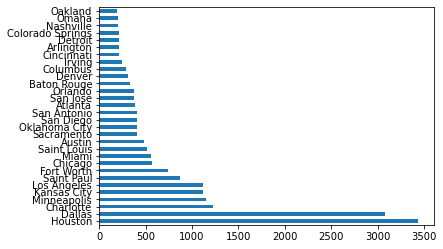

In [21]:
city_accidents[:30].plot(kind = "barh")

- From this we can see that there a lot of cities from California(LA, Sacramento, San Antonio, San Jose, San Diego) which matches our observation that California is the highest state where accidents occur, the second is Texas(Houstan, Dallas and Austin) are among the top cities.

In [22]:
high_accidents = city_accidents[city_accidents>1000]

- Most Accident prone cities

In [23]:
high_accidents

Houston        3436
Dallas         3075
Charlotte      1223
Minneapolis    1155
Kansas City    1122
Los Angeles    1120
Name: City, dtype: int64

In [24]:
#The start time of an accident is time marked
df_1.Start_Time

0        2016-02-08 00:37:08
1        2016-02-08 05:56:20
2        2016-02-08 06:15:39
3        2016-02-08 06:15:39
4        2016-02-08 06:51:45
                ...         
49995    2017-01-26 07:51:18
49996    2017-01-26 08:47:33
49997    2017-01-26 08:43:44
49998    2017-01-26 08:35:30
49999    2017-01-26 08:17:03
Name: Start_Time, Length: 50000, dtype: object

In [25]:
df_1.Start_Time =pd.to_datetime(df.Start_Time)

In [26]:
#Pulling the hour from this in order to check what time does most accidents occur
df_1.Start_Time.dt.hour

0        0
1        5
2        6
3        6
4        6
        ..
49995    7
49996    8
49997    8
49998    8
49999    8
Name: Start_Time, Length: 50000, dtype: int64

/Users/rennithabraham/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time', ylabel='Density'>

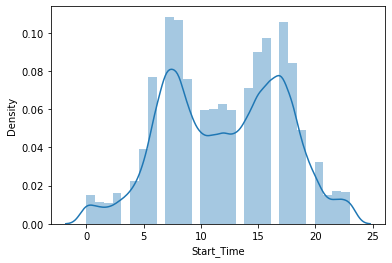

In [27]:
sns.distplot(df_1.Start_Time.dt.hour, bins = 30)

- From this we can see that there are 2 peaks between the tome 6am and 9 am and also between 2 pm and 5pm

In [28]:
#extracting month, year, hour and weekday from timestamp

df_1["Month"] = df_1["Start_Time"].dt.month
df_1["Year"] = df_1["Start_Time"].dt.year
df_1["Hour"] = df_1["Start_Time"].dt.hour
df_1["Weekday"] = df_1["Start_Time"].dt.weekday

In [29]:
df_1.Year.unique()

array([2016, 2017])

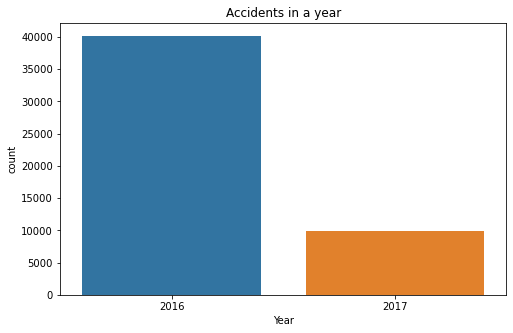

In [30]:
fig = plt.figure(figsize = (8,5))
sns.countplot(x = "Year", data = df_1)
plt.title("Accidents in a year")
plt.show()

- Here we can see that we have only 2 years in from the data and 2016 has a vast difference between the num,ber of accidents from the year 2017

In [31]:
#Subsetting the Year Column

df_1_2016 = df_1[df_1.Start_Time.dt.year == 2016]
df_1_2017 = df_1[df_1.Start_Time.dt.year == 2017]

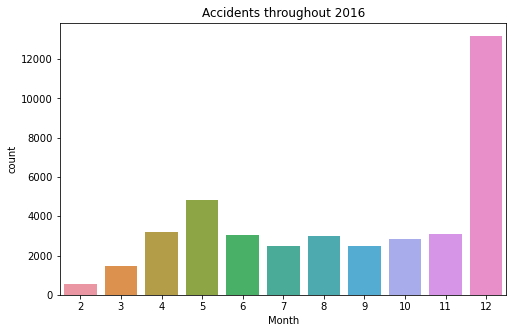

In [32]:
#Monthly accidents in 2016

fig = plt.figure(figsize = (8,5))
sns.countplot(x = "Month", data = df_1_2016)
plt.title("Accidents throughout 2016")
plt.show()

In [33]:
df_1["Temperature(F)"].unique()

array([ 42.1,  36.9,  36. ,  39. ,  37. ,  35.6,  33.8,  33.1,  32. ,
        35.1,  34. ,  33.4,  28. ,  26.6,  25. ,  23. ,  21. ,  19. ,
        21.2,  21.9,  19.4,  22.5,  24.1,  30.2,  31.8,  30. ,  28.9,
        30.9,  19.9,  15.8,  17.1,  12.2,  14. ,  15.3,  17.6,  24.8,
        18. ,  16. ,   7. ,  12. ,  15.1,   9. ,   9.1,  16.5,  12.9,
        10. ,   6.1,   8.1,   5. ,   3. ,   nan,  22.8,  25.2,  27. ,
        24.3,  25.7,  29.8,  32.2,  28.4,  33. ,  37.9,  32.4,  32.7,
        10.9,  43. ,  39.9,  51.1,  46.9,  48. ,  37.4,  53.1,  64. ,
        50. ,  48.9,  61. ,  53.6,  57. ,  61.7,  54. ,  60.1,  64.9,
        52. ,  66.9,  57.9,  63. ,  55.9,  69.1,  68. ,  34.9,  26.2,
        34.2,  46. ,  44.1,  26.1,  39.2,  55.4,  55. ,  40.1,  46.2,
        41. ,  42.8,  32.9,  46.4,  45. ,  32.5,  31.3,  31.6,  29.1,
        27.7,  31.1,  44.6,  27.5,  48.2,  47.7,  62.6,  49.6,  53.4,
        58.3,  59. ,  66. ,  62.1,  70. ,  71.1,  73.9,  72. ,  68.2,
        73. ,  64.4,

In [34]:
df_1["Temperature(F)"].value_counts()

68.0    1109
77.0     964
59.0     931
63.0     819
66.9     756
        ... 
5.7        1
94.5       1
92.1       1
83.8       1
92.3       1
Name: Temperature(F), Length: 602, dtype: int64

/Users/rennithabraham/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature(F)', ylabel='Density'>

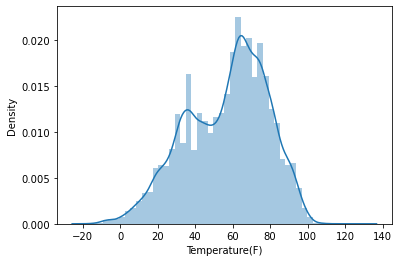

In [35]:
sns.distplot(df["Temperature(F)"])

- We can see that at high temperature higher accidents tend to occur

In [36]:
df_1.Weather_Condition.unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix'], dtype=object)

In [37]:
df_1.Weather_Condition.value_counts()

Clear                           16466
Overcast                        10359
Mostly Cloudy                    6699
Scattered Clouds                 4739
Partly Cloudy                    4597
Light Rain                       1688
Light Snow                       1389
Haze                              505
Rain                              372
Fog                               327
Fair                              230
Light Drizzle                     188
Snow                              137
Light Freezing Rain               124
Light Thunderstorms and Rain      121
Heavy Rain                        120
Cloudy                             79
Light Freezing Drizzle             75
Thunderstorm                       63
Thunderstorms and Rain             60
Heavy Thunderstorms and Rain       49
Mist                               40
Patches of Fog                     38
Drizzle                            34
Light Freezing Fog                 21
Light Ice Pellets                  12
Shallow Fog 

- We can infer that a majority of accidents occur when it is Clear, Overcast and Mostly Cloudy

In [38]:
df_1["Humidity(%)"] .unique()

array([ 58.,  91.,  97.,  55.,  93., 100.,  92.,  70.,  96.,  79.,  88.,
        80.,  86.,  82.,  90.,  74.,  84.,  81.,  73.,  77.,  85.,  78.,
        68.,  75.,  63.,  65.,  57.,  56.,  87.,  59.,  60.,  83.,  62.,
        48.,  71.,  54.,  52.,  46.,  42.,  50.,  41.,  51.,  66.,  67.,
        nan,  89.,  94.,  76.,  69.,  72.,  31.,  44.,  38.,  49.,  45.,
        35.,  29.,  43.,  32.,  33.,  34.,  26.,  47.,  37.,  30.,  40.,
        61.,  64.,  53.,  99.,  27.,  39.,  17.,  28.,  24.,  98.,  95.,
        36.,  23.,  18.,  19.,  22.,  21.,  25.,   4.,  11.,  20.,  15.,
        12.,  16.,  14.,  13.,   9.,  10.,   7.,   5.,   8.,   6.])

In [39]:
df_1["Humidity(%)"].value_counts()

100.0    1847
93.0     1763
89.0     1041
78.0      965
87.0      952
         ... 
8.0        24
7.0        12
4.0         9
6.0         3
5.0         2
Name: Humidity(%), Length: 97, dtype: int64

/Users/rennithabraham/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity(%)'>

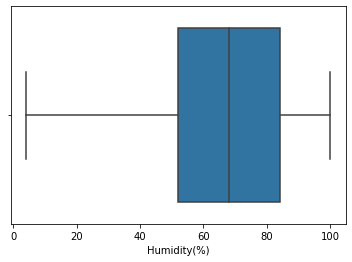

In [40]:
sns.boxplot(df_1["Humidity(%)"])

- When humidity is between 60-80 there are more accidents

In [41]:
df_1["Visibility(mi)"].unique()

array([1.00e+01, 3.00e+00, 5.00e-01, 1.80e+00, 1.00e+00, 6.00e+00,
       8.00e+00, 2.00e+00, 1.50e+00, 1.20e+00, 5.00e+00, 2.50e+00,
       4.00e+00, 8.00e-01, 7.00e+00, 9.00e+00,      nan, 7.50e-01,
       2.00e+01, 2.50e-01, 2.00e-01, 1.50e+01, 3.00e+01, 5.50e+00,
       1.30e+01, 6.00e+01, 5.00e+01, 3.50e+01, 2.50e+01, 1.00e-01,
       0.00e+00, 1.10e+01, 7.00e+01, 1.20e+01, 4.00e+01, 6.20e+00,
       1.11e+02, 2.20e+00, 3.50e+00, 1.90e+01])

In [42]:
df_1["Visibility(mi)"].value_counts()

10.00     37327
7.00       1518
9.00       1292
5.00       1040
8.00        949
3.00        846
4.00        837
6.00        810
13.00       684
2.00        569
2.50        506
1.00        356
0.50        317
1.50        283
0.80        241
0.20        231
1.80        210
1.20        171
30.00        64
0.10         43
50.00        43
20.00        39
15.00        36
12.00        30
11.00        28
40.00        16
0.00         16
25.00         9
0.75          4
60.00         3
70.00         3
5.50          3
35.00         1
0.25          1
6.20          1
111.00        1
2.20          1
3.50          1
19.00         1
Name: Visibility(mi), dtype: int64

<AxesSubplot:xlabel='Visibility(mi)', ylabel='Count'>

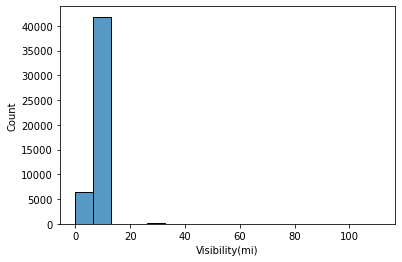

In [43]:
sns.histplot(df_1["Visibility(mi)"])

In [44]:
df_1["Traffic_Signal"].unique()

array([False,  True])

In [45]:
df_1["Traffic_Signal"].value_counts()

False    45879
True      4121
Name: Traffic_Signal, dtype: int64

<AxesSubplot:ylabel='Traffic_Signal'>

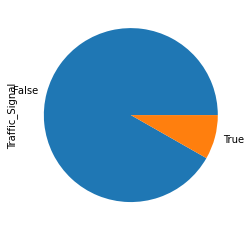

In [46]:
df_1["Traffic_Signal"].value_counts().plot(kind = "pie")

- we can see that traffic signals can be a couse for an increase in accidents

<AxesSubplot:ylabel='Junction'>

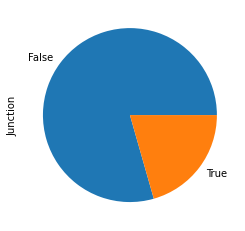

In [47]:
df_1["Junction"].value_counts().plot(kind = "pie")

- We can see that accidents occur at junctions and hence better precautions are needed

In [48]:
df_1["Severity"].unique()

array([3, 2, 4])

In [49]:
df_1["Severity"].value_counts()

2    35010
3    10075
4     4915
Name: Severity, dtype: int64

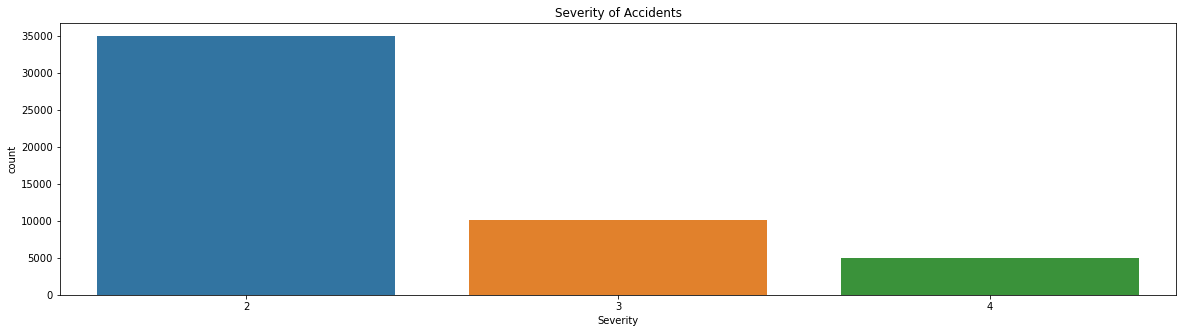

In [55]:
fig = plt.figure(figsize = (20,5))
sns.countplot(x = "Severity", data = df_1)
plt.title("Severity of Accidents")
plt.show()

- We can see that Severity 2 is the highest 

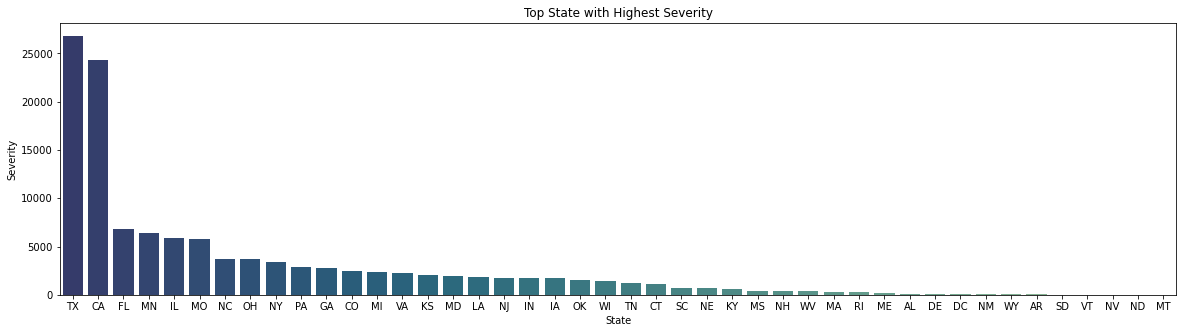

In [78]:
df_state = df_1.groupby('State').sum('Severity')[['Severity']]
df_state = df_state.reset_index().sort_values('Severity', ascending = False)[:50]
fig, ax = plt.subplots(figsize = (20,5))
c = sns.barplot(x = 'State', y = 'Severity', data = df_state, orient = 'v', palette = "crest_r")
c.set_title("Top State with Highest Severity")
plt.show()


In [ ]:
- Conslusions

